In [18]:
import mtcnn
import cv2
import matplotlib.pyplot as plt

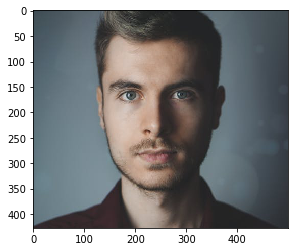

In [27]:
filename = "Man.jpeg"
pixels = plt.imread(filename)
imgplot = plt.imshow(pixels)
plt.show()

In [28]:
print("Shape of image/array:",pixels.shape)
plt.show()

Shape of image/array: (427, 500, 3)


In [29]:
def draw_facebox(filename,result_list):
    # loading the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing box
    ax = plt.gca()
    # plot each box
    for result in result_list:
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x,y), width, height, fill = False, color = 'red')
        # draw the box
        ax.add_patch(rect)
        # show the plot
        plt.show()   

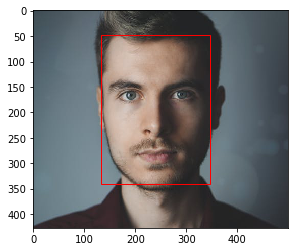

[{'box': [133, 47, 214, 293], 'confidence': 0.9989787340164185, 'keypoints': {'left_eye': (188, 167), 'right_eye': (291, 166), 'nose': (237, 228), 'mouth_left': (200, 280), 'mouth_right': (282, 278)}}]


In [30]:
detector = mtcnn.MTCNN()
faces = detector.detect_faces(pixels)
draw_facebox(filename,faces)
print(faces)

In [2]:
detector = mtcnn.MTCNN()
cap = cv2.VideoCapture(0)
while True:
    __,frame = cap.read()
    
    result = detector.detect_faces(frame)
    if result != []:
        for person in result:
            bounding_box = person['box']
            cv2.rectangle(frame,
                          (bounding_box[0], bounding_box[1]),
                          (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                          (0,155,255),
                          2)
            cv2.imshow('frame',frame)
            
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#When everything's done, release capture
cap.release()
cv2.destroyAllWindows()